In [15]:
import numpy as np
import pandas as pd

data = pd.read_csv("time_series_19-covid-Confirmed.csv")
print(data.shape)
data.head()

(255, 51)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,411,413,414,414,418,418,422,426,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,102,119,120,124


In [16]:
china_y = []
italy_y = []

for j in range(4, 51): #These are the dates - on columns
    tempsum_china = 0
    tempsum_italy = 0
    for i in range(0, len(data)):
        if data.iloc[i, 1] == "Mainland China": #Check if the country is china
            tempsum_china = tempsum_china + data.iloc[i, j]
        if data.iloc[i, 1] == "Italy": #Check if the country is Italy
            tempsum_italy = tempsum_italy + data.iloc[i, j]
    china_y.append(tempsum_china)
    italy_y.append(tempsum_italy)
print("China cases up to 08/03/2020: {}".format(china_y[len(china_y) - 1]))
print("Italy cases up to 08/03/2020: {}".format(italy_y[len(italy_y) - 1]))
len(italy_y)

China cases up to 08/03/2020: 80699
Italy cases up to 08/03/2020: 7375


47

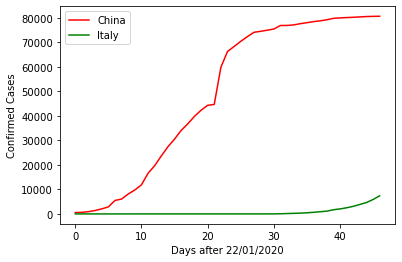

In [17]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 22/01/2020")

plt.plot(china_y, color='red', label='China')
plt.plot(italy_y, color='green', label='Italy')
plt.legend()
plt.show()

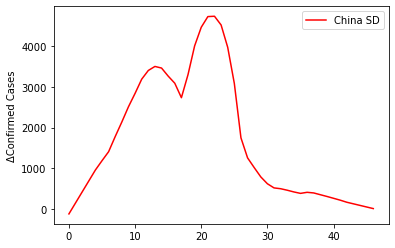

In [18]:
from scipy.signal import savgol_filter

deriv_china = savgol_filter(china_y, 9, 2, 1) #Polynomial degree is 2 since the function should look like a parabola

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_china, color='red', label="China SD")
plt.legend()
plt.show()

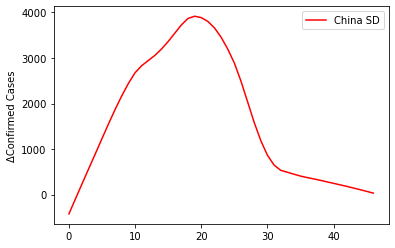

In [19]:
from scipy.signal import savgol_filter

deriv_china = savgol_filter(china_y, int(len(china_y)/3), 2, 1) #Polynomial degree is 2 since the function should look like a parabola
deriv_china = savgol_filter(deriv_china, int(len(china_y)/5), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_china, color='red', label="China SD")
plt.legend()
plt.show()

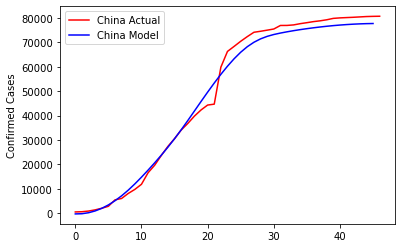

In [20]:
from scipy import integrate

china_y_pred = integrate.cumtrapz(deriv_china) 

plt.ylabel("Confirmed Cases")

plt.plot(china_y, color='red', label="China Actual")
plt.plot(china_y_pred, color='blue', label='China Model')
plt.legend()
plt.show()

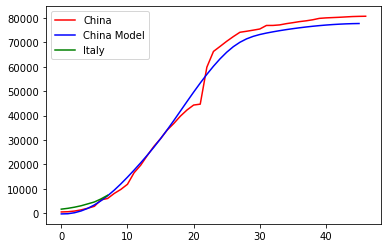

In [21]:
italy_y = italy_y[39:]
deriv_italy = savgol_filter(italy_y, 5, 2, 1)
deriv_italy = savgol_filter(deriv_italy, 3, 2, 0)

plt.plot(china_y, color='red', label='China')
plt.plot(china_y_pred, color='blue', label="China Model")
plt.plot(italy_y, color='green', label='Italy')
plt.legend()
plt.show()

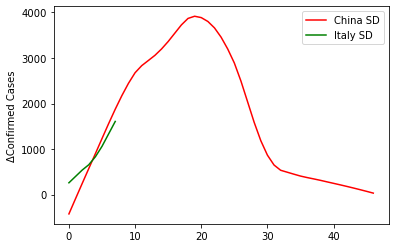

In [22]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_china, color='red', label='China SD')
plt.plot(deriv_italy, color='green', label='Italy SD')
plt.legend()
plt.show()

[-424.06095081  -89.6827878   242.32653817  571.96702709  899.23867897
 1230.61475289 1558.38597124 1875.11832957 2173.26003233 2444.248141
 2676.64322155 2831.85500928 2944.67765925 3058.63160173 3198.72875696
 3362.01399196 3544.70197897 3726.99642857 3869.24897959 3917.24627396
 3887.40987941 3802.66552257 3661.40157699 3457.2742115  3198.1224026
 2890.26227582 2492.81971243 2040.22019171 1586.20160792 1184.40834879
  866.66516698  649.8041744   534.64457328  491.68356524  448.65910637
  407.18426098  374.48986686  344.75562952  313.7870812   280.23541689
  247.27448889  214.26567991  180.05886173  144.86929717  108.58110772
   71.19429335   32.70885409]
[  32.70885409 -424.06095081  -89.6827878   242.32653817  571.96702709
  899.23867897 1230.61475289 1558.38597124 1875.11832957 2173.26003233
 2444.248141   2676.64322155 2831.85500928 2944.67765925 3058.63160173
 3198.72875696 3362.01399196 3544.70197897 3726.99642857 3869.24897959
 3917.24627396 3887.40987941 3802.66552257 3661.40

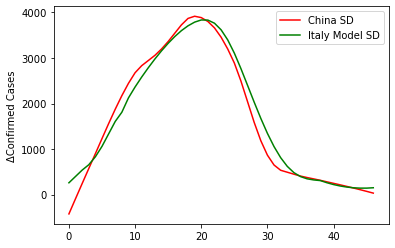

In [23]:
print(deriv_china)
italy_derv_model = np.roll(deriv_china, 1)
print(italy_derv_model)
italy_derv_model = savgol_filter(italy_derv_model, 17, 2, 0)
italy_basic_model= []
for i in range(8):
    italy_basic_model.append(deriv_italy[i])

for i in range(8, len(italy_derv_model)):
    italy_basic_model.append(italy_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_china, color='red', label="China SD")
plt.plot(italy_basic_model, color='green', label='Italy Model SD')
plt.legend()
plt.show()

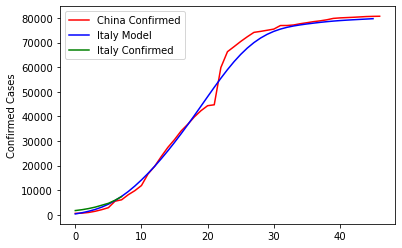

array([  329.17142857,   797.62857143,  1394.47857143,  2137.72857143,
        3083.02857143,  4279.51428571,  5749.57142857,  7457.59592747,
        9424.44379391, 11668.54602868, 14141.60964619, 16826.3176826 ,
       19709.57758258, 22778.58100141, 26019.26235756, 29416.33698213,
       32952.34324881, 36606.24290061, 40353.74608283, 44165.44694859,
       47999.66580879, 51798.20637681, 55489.85386444, 58998.25479565,
       62250.66670625, 65187.09061577, 67769.44980727, 69984.18444303,
       71836.68420805, 73346.57575301, 74546.39260843, 75479.39456533,
       76195.50765325, 76747.27218448, 77186.41546842, 77557.53942582,
       77892.07265735, 78207.18617116, 78491.35513539, 78731.92387726,
       78936.86880318, 79114.16631956, 79271.79283284, 79417.72474942,
       79559.93847574, 79706.41041821])

In [25]:
italy_basic_model_confirmed = integrate.cumtrapz(italy_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(china_y, color='red', label='China Confirmed')
plt.plot(italy_basic_model_confirmed, color='blue', label='Italy Model')
plt.plot(italy_y, color='green', label='Italy Confirmed')
plt.legend()
plt.show()
italy_basic_model_confirmed

In [24]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

#index 8 in italy_basic_model_confirmed is 9th of March 2020
start_pred = 1583712000
for i in range(8, len(italy_basic_model_confirmed)):
    t = time.strftime('%Y-%m-%d', time.localtime(start_pred))
    pred = italy_basic_model_confirmed[i]
    predictions.at[i-8, "Date"] = t
    predictions.at[i-8, "Predicted Cases"] = pred
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
0,2020-03-09,9424.44
1,2020-03-10,11668.5
2,2020-03-11,14141.6
3,2020-03-12,16826.3
4,2020-03-13,19709.6
5,2020-03-14,22778.6
6,2020-03-15,26019.3
7,2020-03-16,29416.3
8,2020-03-17,32952.3
9,2020-03-18,36606.2
